In [81]:
#Import all necessary materials for Data Analysis 
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle
from scipy import interp
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler,label_binarize
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, learning_curve, cross_val_score, KFold, GridSearchCV,train_test_split



In [2]:
#Read in the data to a Pandas DataFame
df = pd.read_csv("~/mlClass/finalproject/heart.csv")

#Randomaly mix up rows (originally arranged in order of target column) 
df = df.sample(frac = 1)

#Look at top5 lines of data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1


Dimensionality of X (303, 13)
Dimensionality of y (303,)
Pairwise distances:


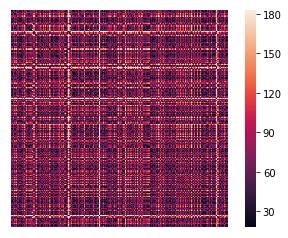

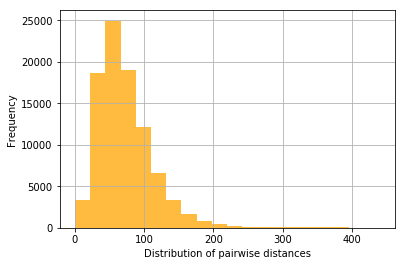

In [3]:
#Assign all columns, except Target to data matrix
X = df.drop('target', axis = 1)

#Assign Target column to Target matrix
y = df['target']
# y.shape
# X.shape

#Look at Shape of the Data and Target
print("Dimensionality of X", X.shape)
print("Dimensionality of y", y.shape)

#Create a heatmap of the Pairwise Distance between each datapoint in the Data Matrix
##Preliminary, Does anything pop out of the page?
D = sklearn.metrics.pairwise_distances(X, metric='euclidean', n_jobs=-1)
print("Pairwise distances:")
sns.heatmap(D, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

#Create a histogram of the distribution of the Data
##Is it parametric? Non-parametric?
plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

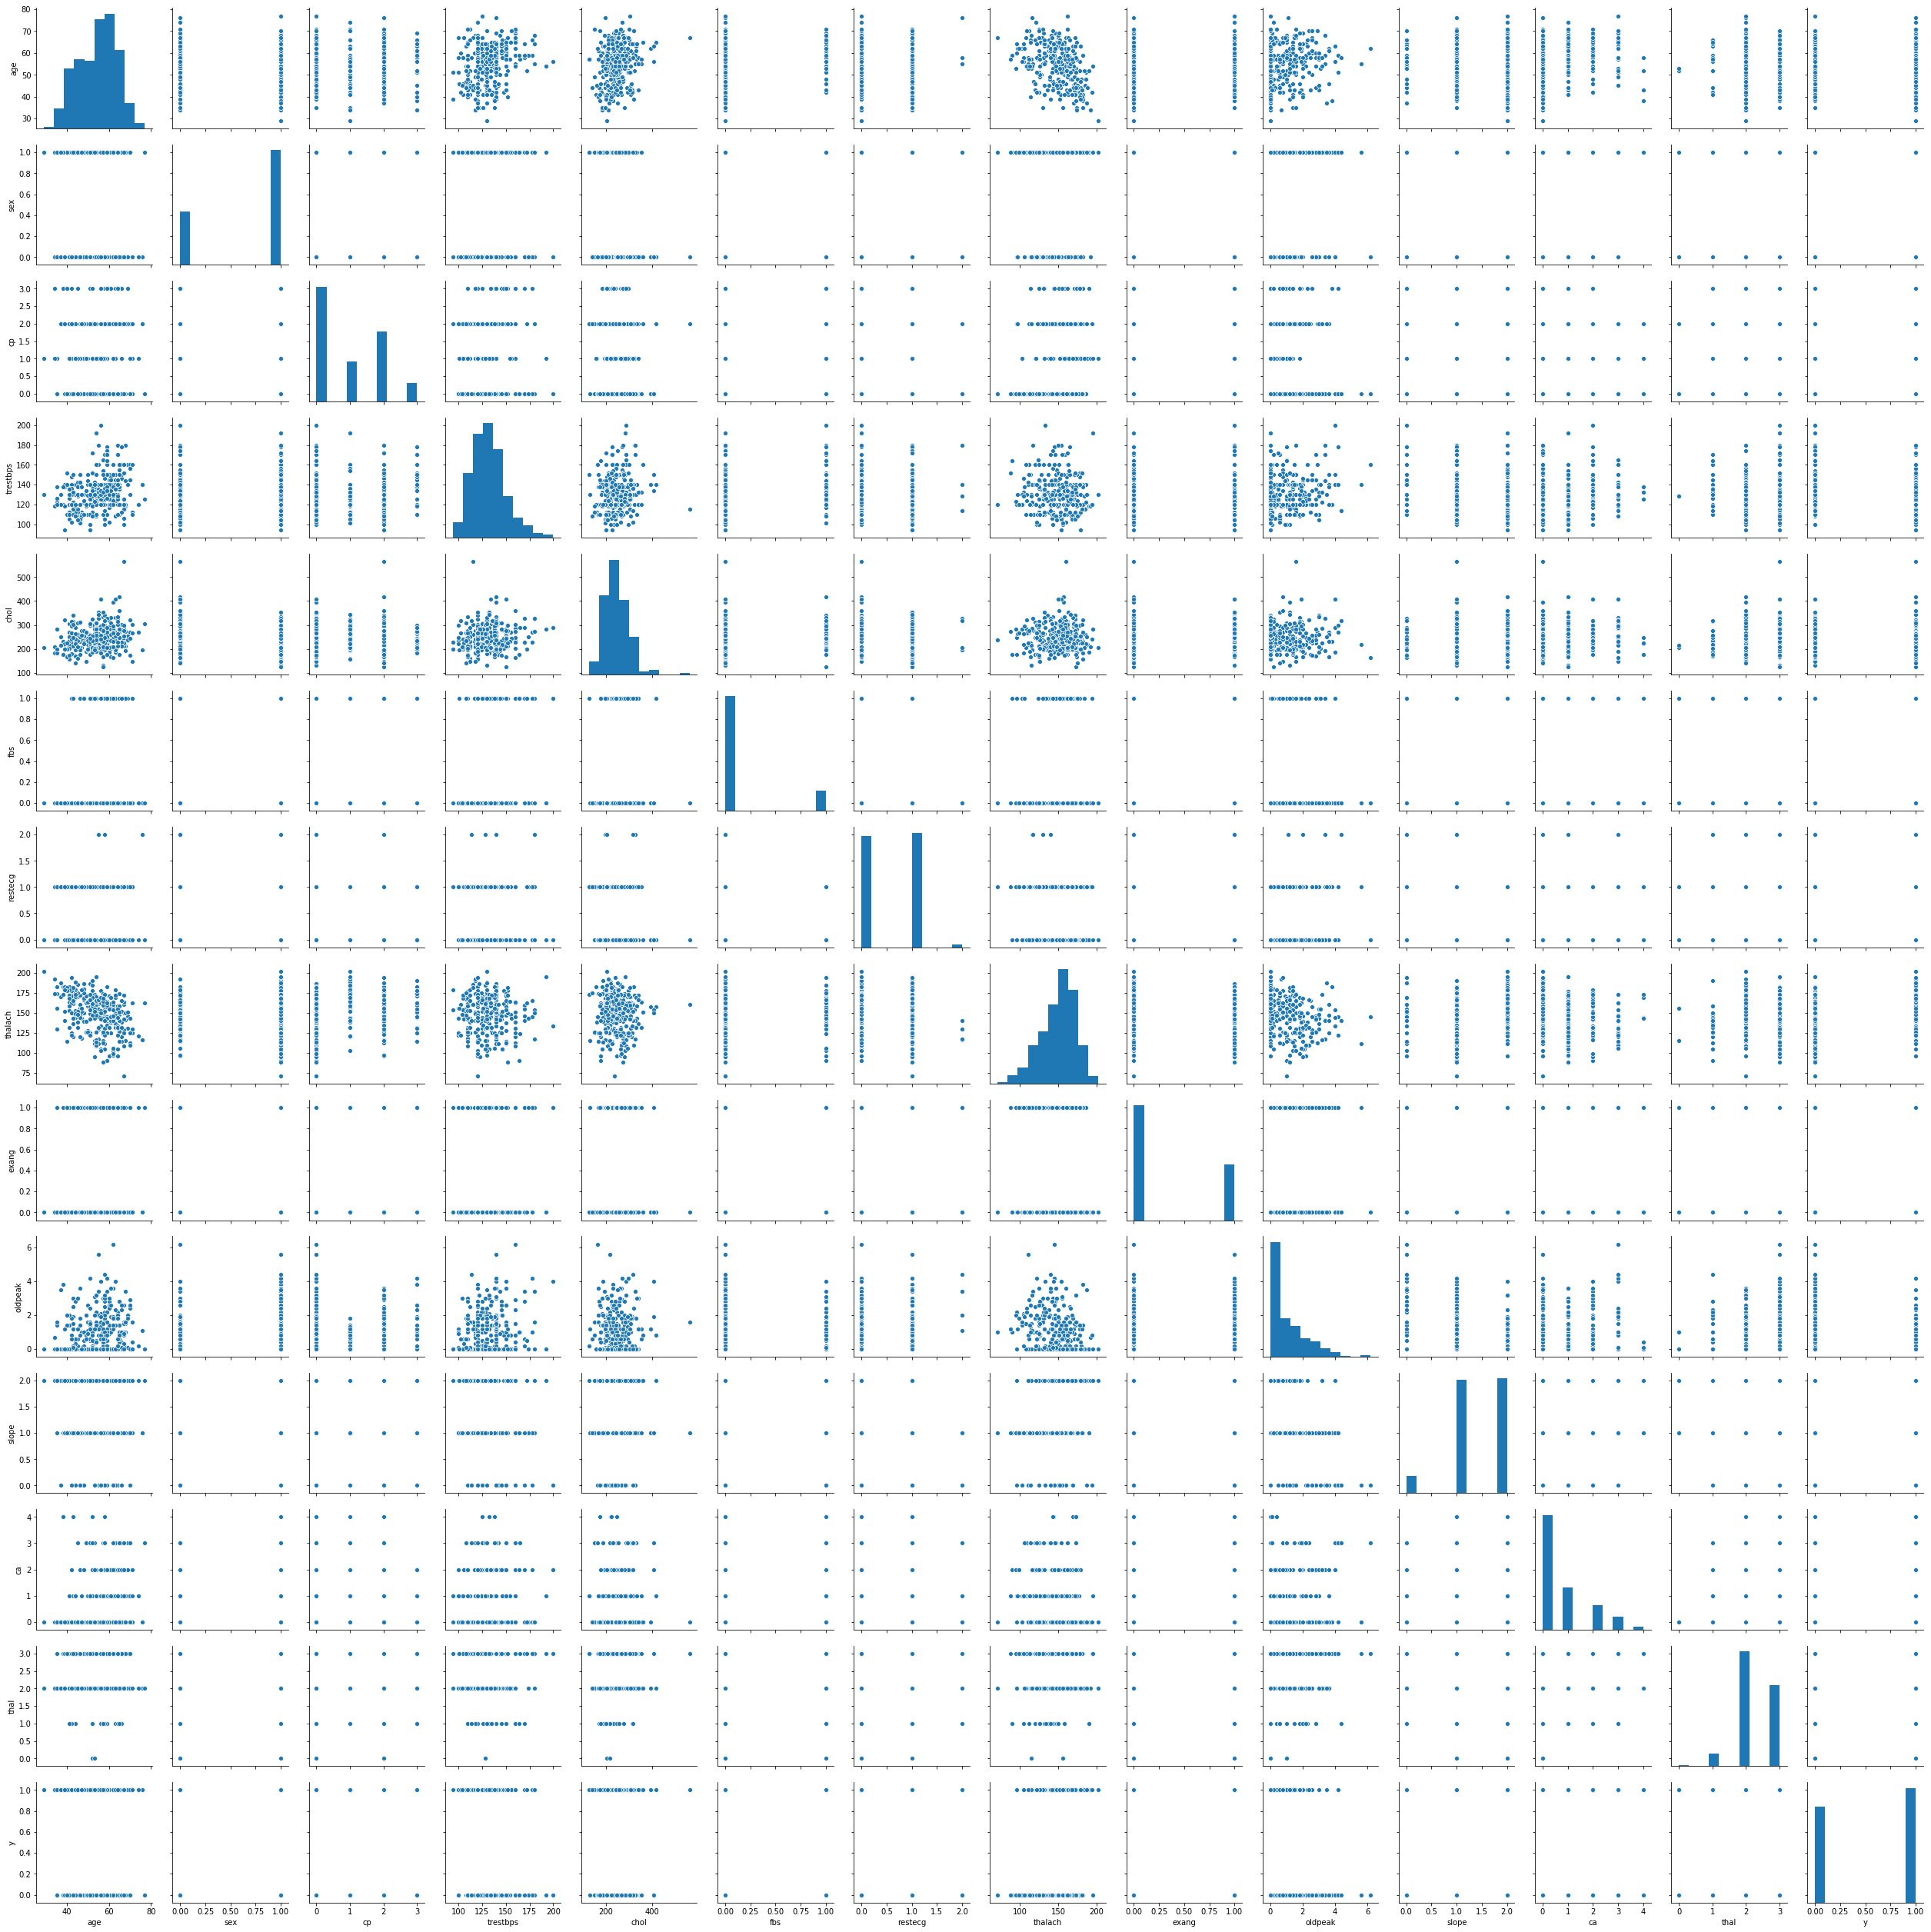

In [4]:
##Assign X and Y to dataFrame and use Seaborn to plot scatterplots between each attribute
d = pd.DataFrame(X)
d['y'] = pd.Series(Y)
sns.pairplot(d)

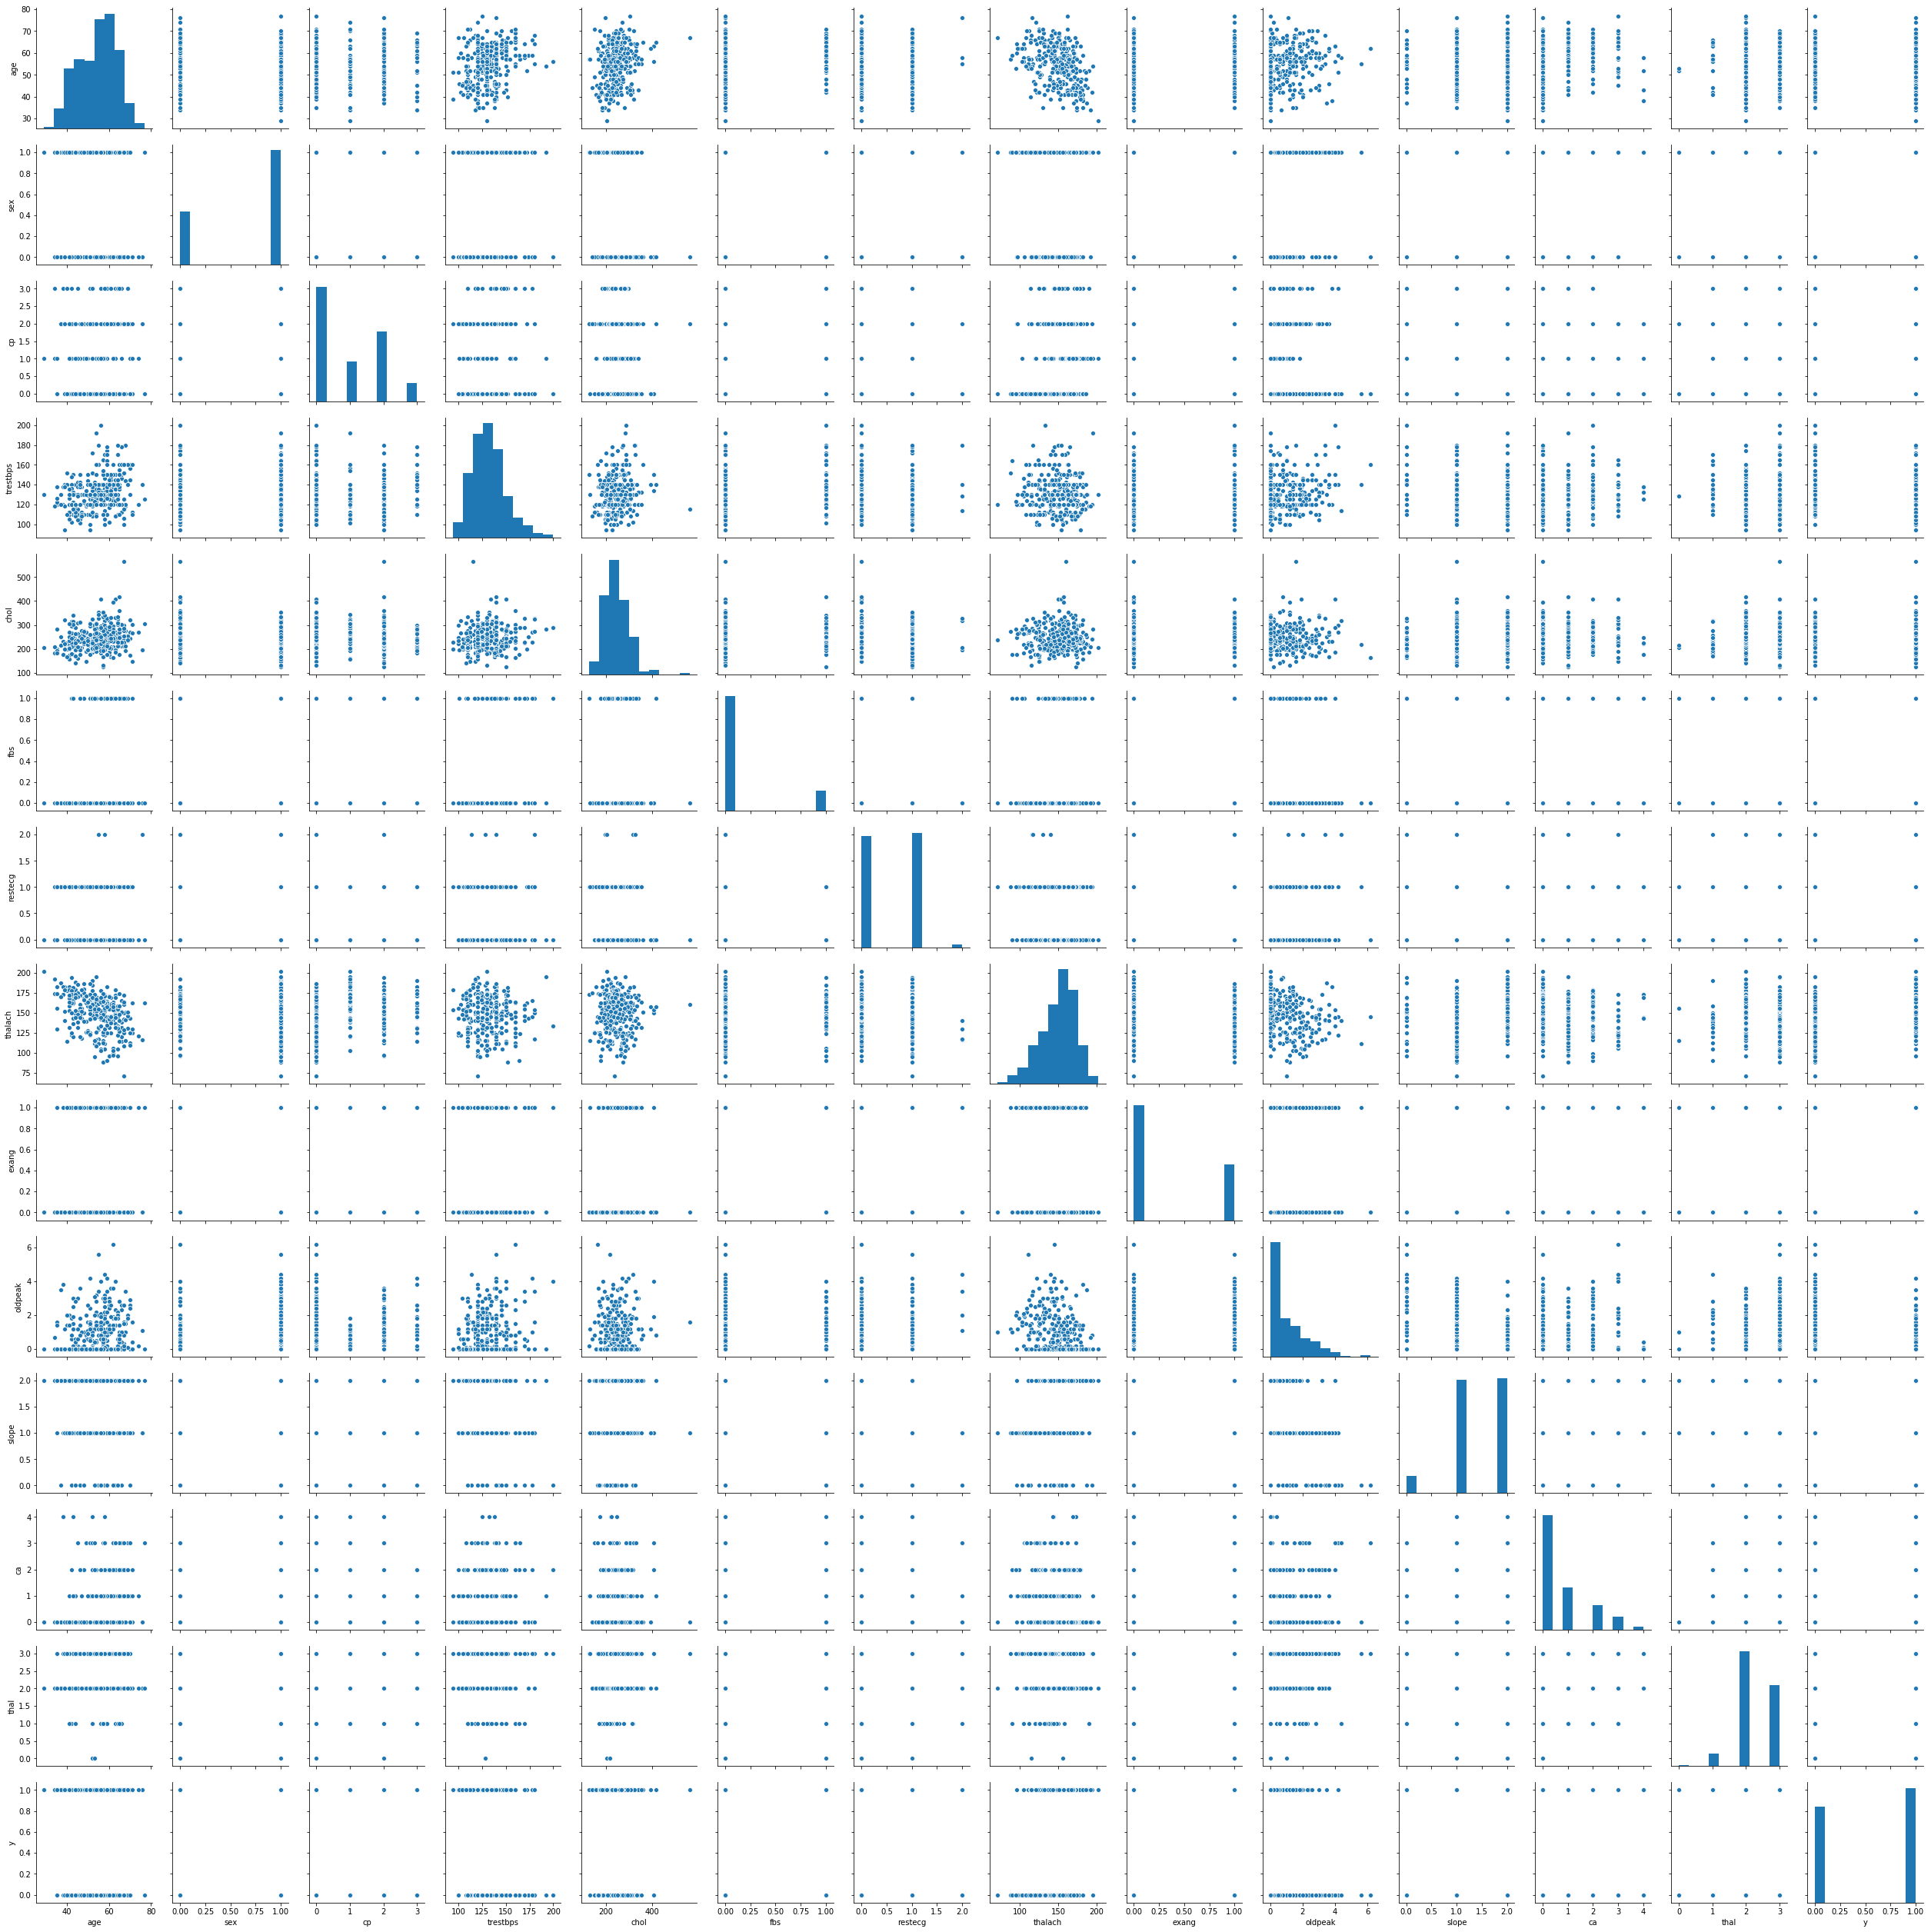

In [4]:
##Assign X and Y to dataFrame and use Seaborn to plot scatterplots between each attribute
d = pd.DataFrame(X)
d['y'] = pd.Series(y)
sns.pairplot(d)

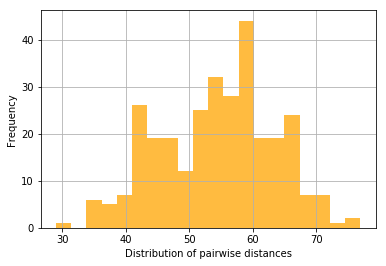

In [5]:
#Plot distribution of Age

age = df['age']
plt.hist(age, 20, facecolor='orange', alpha=0.75)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

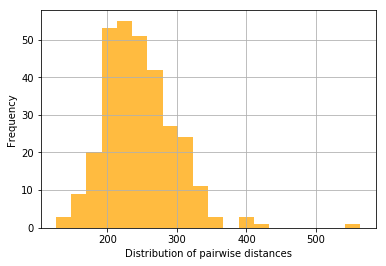

In [6]:
#Plot distribution of Cholesterol 

chol = df['chol']
plt.hist(chol, 20, facecolor='orange', alpha=0.75)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
##Plot standard normalized distribution of Cholesterol 

# scaler = StandardScaler()
# chol_scaled = scaler.fit_transform(df[['chol']])
# plt.hist(chol_scaled, 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Distribution of pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [34]:
##Plot MinMax normalized distribution of Cholesterol 

# scaler = MinMaxScaler()
# chol_scaled = scaler.fit_transform(df[['chol']])
# plt.hist(chol_scaled, 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Distribution of pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

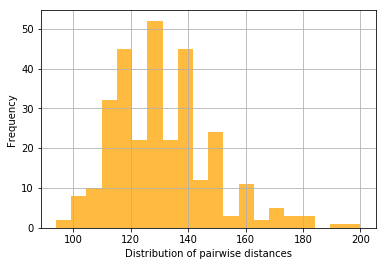

In [7]:
##Plot distribution of T

trestbps = df['trestbps']
plt.hist(trestbps, 20, facecolor='orange', alpha=0.75)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
# scaler = MinMaxScaler()
# trestbps_scaled = scaler.fit_transform(df[['trestbps']])
# plt.hist(trestbps_scaled, 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Distribution of pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [32]:
# scaler = StandardScaler()
# trestbps_scaled = scaler.fit_transform(df[['trestbps']])
# plt.hist(trestbps_scaled, 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Distribution of pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

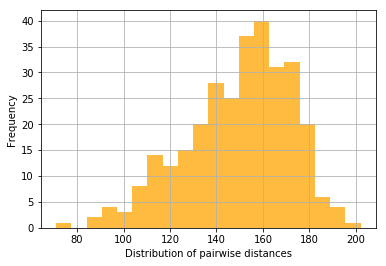

In [38]:
thalach = df['thalach']
plt.hist(thalach, 20, facecolor='orange', alpha=0.75)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [105]:
# scaler = StandardScaler()
# thalach_scaled = scaler.fit_transform(df[['thalach']])
# plt.hist(thalach_scaled, 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Distribution of pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [106]:
# scaler = MinMaxScaler()
# thalach_scaled = scaler.fit_transform(df[['thalach']])
# plt.hist(thalach_scaled, 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Distribution of pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

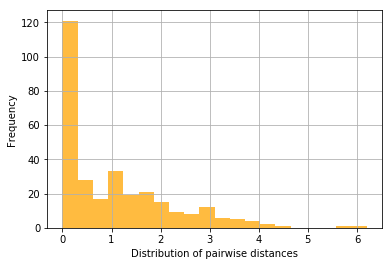

In [107]:
oldpeak = df['oldpeak']
plt.hist(oldpeak, 20, facecolor='orange', alpha=0.75)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [50]:
# scaler = StandardScaler()
# oldpeak_scaled = scaler.fit_transform(df[['oldpeak']])
# plt.hist(oldpeak_scaled, 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Distribution of pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [51]:
# scaler = MinMaxScaler()
# oldpeak_scaled = scaler.fit_transform(df[['oldpeak']])
# plt.hist(oldpeak_scaled, 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Distribution of pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [8]:
#Check if there is any missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Assign all columns, except Target to data matrix
X = df.drop('target', axis = 1)

#Assign Target column to Target matrix
y = df['target']

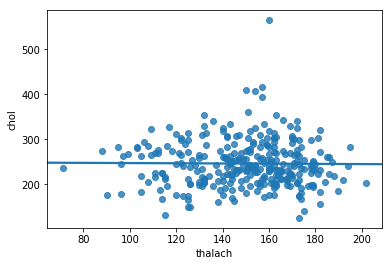

In [10]:
#Scatter Plot Linear Regression of Two Variables 
sns.regplot(d['thalach'], d['chol'], data=d, ci=None)

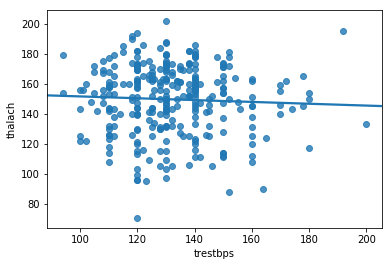

In [18]:
#Scatter Plot Linear Regression of Two Variables 
sns.regplot(d['trestbps'], d['thalach'], data=d, ci=None)

In [5]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.3, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



## This Function plots the cross validation scores and training accuracy scores 
## using the following inputs (Model, title of plot, Data and target)
## The output of this function is a plot showing the cross-validation and 
## training accuracy scores of the model & data selected. 

# Random Forest Classifier


/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/si

/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/si

/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/islekda/anaconda3/lib/python3.7/si

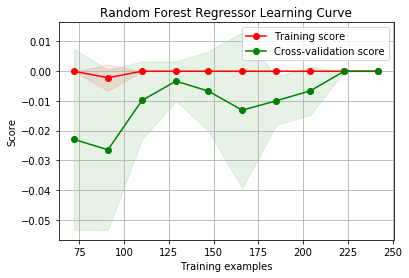

0.9967741935483871


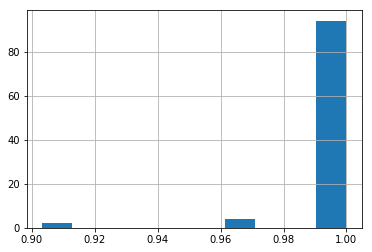

In [12]:
rf = RandomForestClassifier()
ss = ShuffleSplit(n_splits=100, test_size=0.1, random_state=10)
s   = cross_val_score(rf, X, y, cv=ss)
title = "Random Forest Regressor Learning Curve using Shuffle Split"
#here we try to maximize the score, that is why neg_mean_squared_error
# essentially, score = - cost_function
plot_learning_curve(rf, title, X, y, cv=cv, n_jobs=4)
plt.show()

pd.Series(s).hist()
print(s.mean()) # R^2

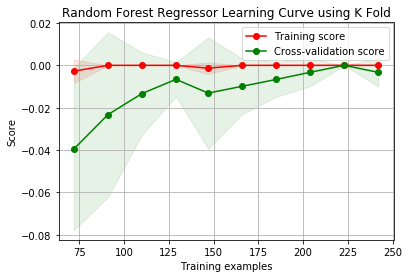

0.9967741935483871


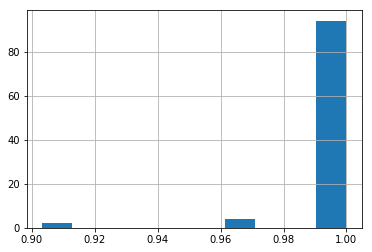

In [13]:
kfld  = KFold(n_splits=5, shuffle=True, random_state=10)
title = "Random Forest Regressor Learning Curve using K Fold"
plot_learning_curve(rf, title, X, y, cv=kfld, n_jobs=4)
plt.show()
pd.Series(s).hist()
print(s.mean()) # R^2

0.9974193548387098

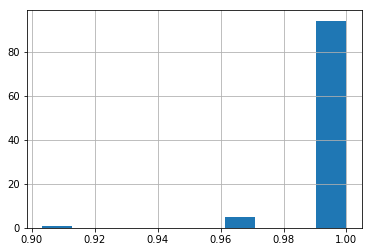

In [11]:
##Histogram of Cross-validation Scores
pd.Series(s).hist()
##Mean of Cross-validation scores
s.mean() # R^2

In [60]:
X_train = X[:220]
y_train = y[:220]
X_test = X[:-220]
y_test = y[:-220]

## Feature Contribution / Feature Selection 

In [61]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

3
Index(['cp', 'thal', 'y'], dtype='object')


### Using Selected Features

0.0
[[36  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



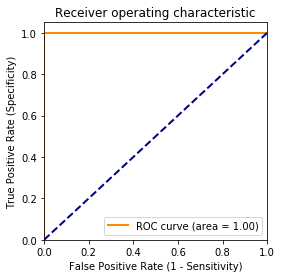

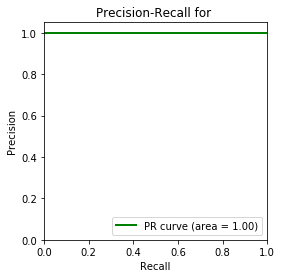

In [62]:
##Separate Selected Features
X_sel = X[['cp', 'thal']]
X_sel_train= X[:220]
X_sel_test = X[:-220]


##Fit model using selected features
rf.fit(X_sel_train, y_train)

##Predict outcome using selected features 
y_pred = rf.predict(X_sel_test)

##MSE
print(mean_squared_error(y_test, y_pred))

##Confusion Matrix
print(confusion_matrix(y_test, y_pred))

##Classification Report
print(classification_report(y_test, np.round(y_pred)))

##Plot ROC & Precision Operator Curves 
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Precision-recall:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

# Plot ROC Curve for Binary Classification Model using SVM

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Sensitivity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall Curve for Binary Classification Model using SVM
plt.figure(figsize=(4,4))
plt.plot(recall, precision, color='green',lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for ' )
plt.legend(loc="lower right")
plt.show()

### Using All Features 

[[36  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



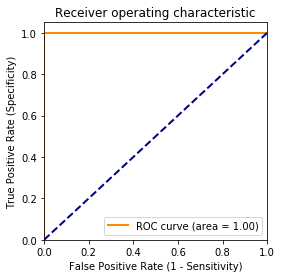

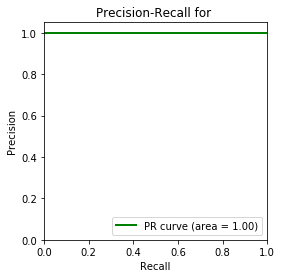

In [63]:
##Fit 
rf.fit(X_train, y_train)

##Predict
y_pred = rf.predict(X_test)

##Mean Squared Error (MSE)
mean_squared_error(y_test, y_pred)

##Confusion Matrix
print(confusion_matrix(y_test, np.round(y_pred)))

##Classification Report
print(classification_report(y_test, np.round(y_pred)))

##Plot ROC & Precision Operator Curves 
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Sensitivity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall Curve for Binary Classification Model using SVM
plt.figure(figsize=(4,4))
plt.plot(recall, precision, color='green',lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for ' )
plt.legend(loc="lower right")
plt.show()

### Using all except selected features

[[36  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



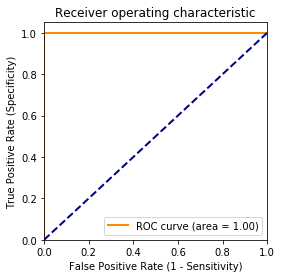

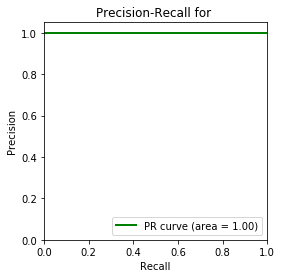

In [69]:
X_rm_sel = X.drop('cp', axis = 1)
X_rm_sel = X_rm_sel.drop('thal', axis = 1)
X_rm_sel_train = X_rm_sel[:220]
X_rm_sel_test = X_rm_sel[:-220]
                  
X = df.drop('target', axis = 1)
##Fit 
rf.fit(X_rm_sel_train, y_train)

##Predict
y_pred = rf.predict(X_rm_sel_test)

##Mean Squared Error (MSE)
mean_squared_error(y_test, y_pred)

##Confusion Matrix
print(confusion_matrix(y_test, y_pred))

##Classification Report
print(classification_report(y_test, np.round(y_pred)))

##Plot ROC & Precision Operator Curves 
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Sensitivity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall Curve for Binary Classification Model using SVM
plt.figure(figsize=(4,4))
plt.plot(recall, precision, color='green',lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for ' )
plt.legend(loc="lower right")
plt.show()

In [23]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### SVM One vs Rest Classifier 

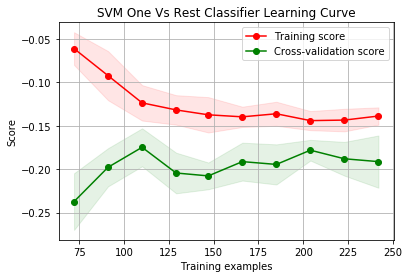

In [71]:
### SVM One vs Rest Classifier 
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
model = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
# model = KNeighborsRegressor(n_neighbors=2)
title = "SVM One Vs Rest Classifier Learning Curve"
s = cross_val_score(model, X, Y, cv=cv)
plot_learning_curve(model, title, X, y, cv=cv, n_jobs=4)

plt.show()
pd.Series(s).hist()

In [ ]:
##Assigning Testing And Training Datasets according to Learning Curve
X_train = X[:200]
y_train = Y[:200]
X_test = X[:-200]
y_test = Y[:-200]

In [72]:
sel = SelectFromModel(OneVsRestClassifier(svm.SVC(kernel='linear', probability=True)))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

1
Index(['y'], dtype='object')


[[36  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



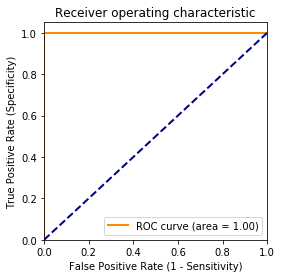

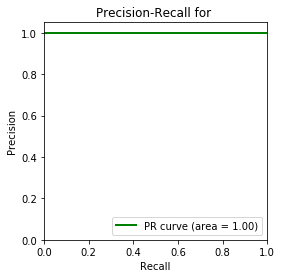

In [75]:
##Fit 
model.fit(X_train, y_train)

##Predict
y_pred = model.predict(X_test)

##Mean Squared Error (MSE)
mean_squared_error(y_test, y_pred)

##Confusion Matrix
print(confusion_matrix(y_test, y_pred))

##Classification Matrix
print(classification_report(y_test, y_pred))

# Report Operator Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Precision-recall:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

# Plot ROC Curve for Binary Classification Model using SVM

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Sensitivity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall Curve for Binary Classification Model using SVM
plt.figure(figsize=(4,4))
plt.plot(recall, precision, color='green',lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for ' )
plt.legend(loc="lower right")
plt.show()

# K Nearest Neighbors Classifier 

In [82]:
##Define KNN Classifier Model
knn = KNeighborsClassifier()

# (Hyper)parameter grid
p_grid = {
    "n_neighbors": [3, 4, 5, 6,7,8,9]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
g = GridSearchCV(knn, p_grid, cv=cv)

g.fit(X, y)
best = g.best_params_
cv = g.cv_results_

print('GridSearch found optimal number of neighbors:', best['n_neighbors'])
print('Mean CV test scores are:', cv['mean_test_score'])

knn = KNeighborsClassifier(n_neighbors = best['n_neighbors']) 
knn.fit(X_train, y_train)

print('Accuracy:', accuracy_score(y_test, knn.predict(X_test)))

GridSearch found optimal number of neighbors: 6
Mean CV test scores are: [0.66666667 0.64026403 0.66666667 0.67326733 0.65676568 0.66336634
 0.64686469]
Accuracy: 0.7951807228915663


/home/islekda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Logistic Regression 

0.8250819672131149


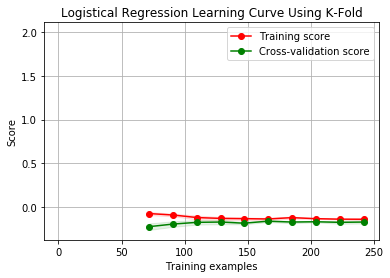

In [96]:
### Logistical Regression Learning Curve  
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
title = "Logistical Regression Learning Curve Using K-Fold"
plot_learning_curve(lr, title, X, y, cv=kfld, n_jobs=4)
s = cross_val_score(lr, X, y, cv=cv_iterator)
print(s.mean())
pd.Series(s).hist()


plt.show()

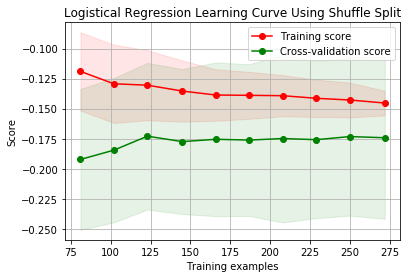

In [95]:
title = "Logistical Regression Learning Curve Using Shuffle Split"
plot_learning_curve(lr, title, X, y, cv=ss, n_jobs=4)
plt.show()

0.12195121951219512
[[43 10]
 [ 5 65]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        53
           1       0.87      0.93      0.90        70

   micro avg       0.88      0.88      0.88       123
   macro avg       0.88      0.87      0.87       123
weighted avg       0.88      0.88      0.88       123



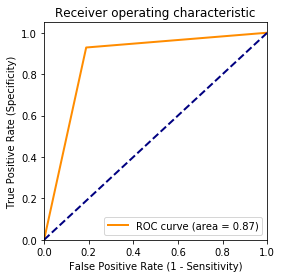

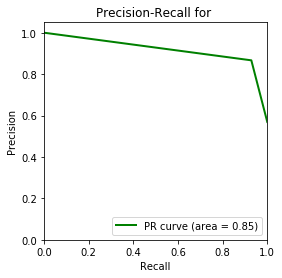

In [97]:
X_train = X[:180]
y_train = y[:180]
X_test = X[:-180]
y_test = y[:-180]


##Fit
lr.fit(X_train, y_train)

##Predict
y_pred = lr.predict(X_test)

##MSE
print(mean_squared_error(y_test, y_pred))

##Confusion Matrix
print(confusion_matrix(y_test, np.round(y_pred)))

##Classification Report
print(classification_report(y_test, np.round(y_pred)))

## Reporter Operator Curve & Precision Recall Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Precision-recall:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

# Plot Reporter Operator Curve for Binary Classification using Logistical Regression 
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Sensitivity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall Curve for Binary Classification Model using SVM
plt.figure(figsize=(4,4))
plt.plot(recall, precision, color='green',lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for ' )
plt.legend(loc="lower right")
plt.show()